In [1]:
%reset -f

In [2]:
# import the package
import numpy as np
import matplotlib.pyplot as plt
from sympy import fourier_series, pi, plot
from sympy.abc import x,L,H
from sympy import Piecewise
import sympy as sp

In [3]:
# global constants
n = int(2**15)
x  = np.linspace(0.0,1.0,n, endpoint=False)
dx = (1.0-0.0)/n

In [4]:
### given function of x ###
def f(x):    
    ff = -999.0*np.ones(len(x))
    for i in range(0,len(x)):
        if(x[i] < 0.6):
            ff[i] = 2.0*x[i]
        else:
            ff[i] = 0.0
    return ff

In [5]:
### the haar wavelets ###
def haar(a,b):

    h = np.zeros(n)

    order = 2**(a-1) # for each positive integer a, order is the number of b
    trans = int(n*b/order) # the translation of the haar function when we apply different b
    
    if(a==0):
        for i in range(0,n):
            h[i] = 1   
        return h  
       
    else:
        for i in range(trans,trans+int(n/2/order)):
            h[i] = 1*np.sqrt(order) # np.sqrt(order) is normalization constant
        for i in range(trans+int(n/2/order),trans+int(n/order)):
            h[i] = -1*np.sqrt(order)
        return h

           

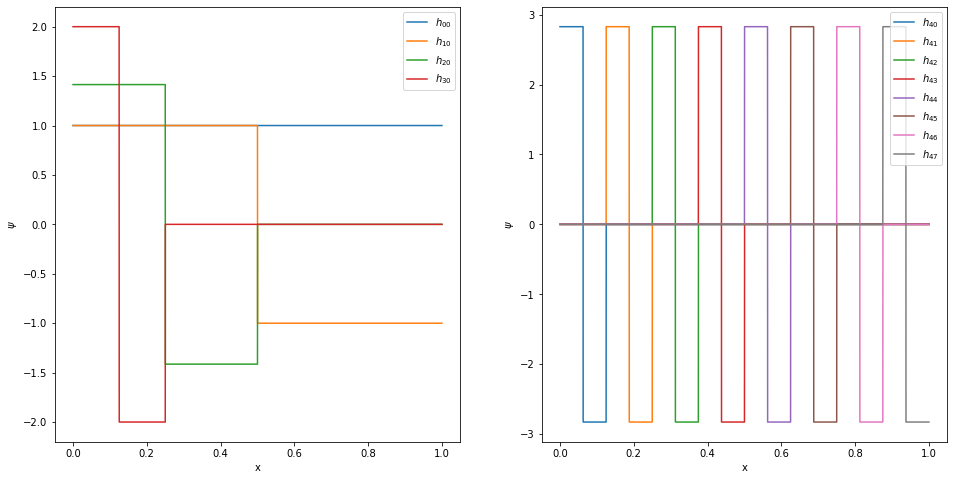

In [6]:
# Check the accuracy of haar function
fig, axes=plt.subplots(1,2,figsize=[16,8])
# Plot the haar function with different a but same b, e.g. b=0
for i in range(4):  
    axes[0].plot(x,haar(i,0),label='$h_{%d 0}$'%i)
# Plot the haar function with same a, e.g. a=4, but all different b
for i in range(8):
    axes[1].plot(x,haar(4,i),label='$h_{4 %d}$'%i)
for ax in axes.flat:
    ax.legend()
    ax.set(xlabel='x',ylabel='$\psi$')
plt.show()

In [7]:
#Check the orthonormality of haar function
def orthonormal(a1,b1,a2,b2):
    return np.sum(np.multiply(haar(a1,b1),haar(a2,b2))*dx)

a1,b1,a2,b2 = 5,2,5,2
print('The orthonormality check between h(%d,%d) and h(%d,%d) is'%(a1,b1,a2,b2),orthonormal(a1,b1,a2,b2))

The orthonormality check between h(5,2) and h(5,2) is 1.0


<font size="5">The equation for calculating coefficient is\
$C_{a,b}=\int h_{a,b}*f(x) \,dx$

In [8]:
### the coefficients: mapping on to haar basis by doing the integral ###
def coeffs(a,b):
    return np.sum(np.multiply(haar(a,b),f(x))*dx)

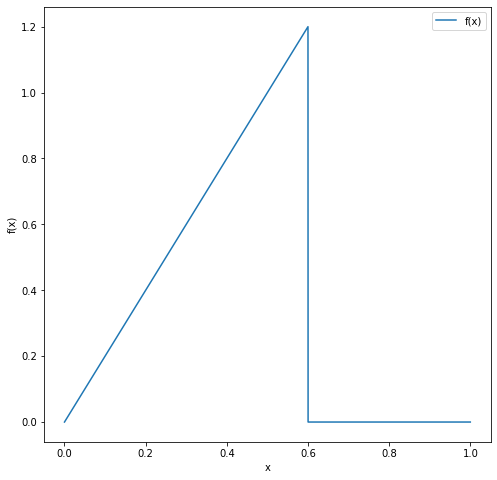

In [9]:
### main script ###
# Plot the original functions
ff = f(x)
fig, ax=plt.subplots(1,1,figsize=[8,8])
ax.plot(x,ff,label='f(x)')
ax.set(xlabel='x',ylabel='f(x)')
ax.legend()
plt.show()

In [10]:
# Calculate the approximate function with a=0
h00 = haar(0,0)
c00 = coeffs(0,0)

print('C(0,0)= %.6f'%c00)
print('haar(0,0)=')
print(h00)


C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]


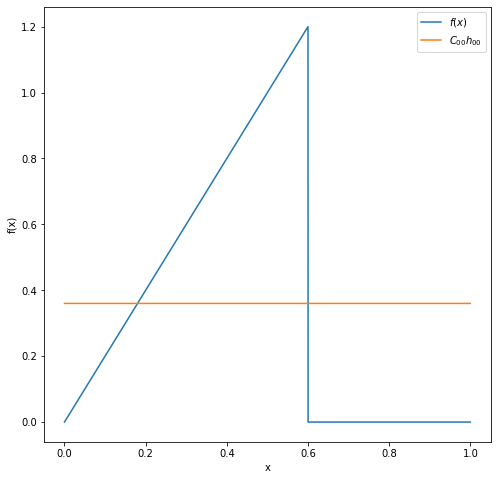

In [11]:
# Plot the approximate function with a=0 
fig, ax=plt.subplots(1,1,figsize=[8,8])
ax.plot(x,ff,label="$f(x)$")
ax.plot(x,h00*c00,label="$C_{00} h_{00}$")
ax.set(xlabel='x',ylabel='f(x)')
ax.legend()
plt.show()

In [12]:
# Calculate the approximate function with a=0,1
h10 = haar(1,0)
c10 = coeffs(1,0)
print('C(1,0)= %.6f'%c10)
print('haar(1,0)=')
print(h10)

C(1,0)= 0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]


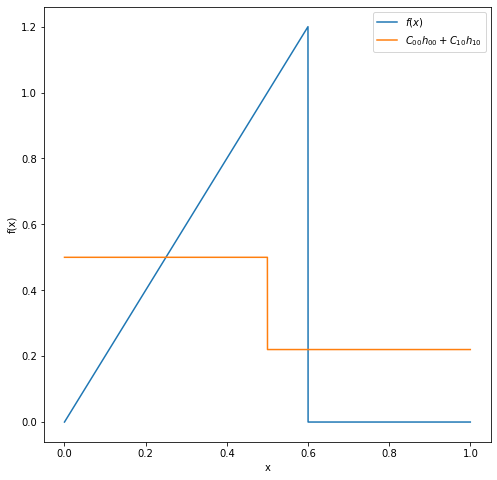

In [13]:
# Plot the approximate function with a=0,1
fig, ax=plt.subplots(1,1,figsize=[8,8])
ax.plot(x,ff,label="$f(x)$")
ax.plot(x,c00*h00 + c10*h10,label="$C_{00} h_{00} + C_{10} h_{10}$")
ax.set(xlabel='x',ylabel='f(x)')
ax.legend()
plt.show()

<font size="5">The approximate func is based on\
$F_{approx}(x) = C_{0,0}h_{0,0}+\sum_{a=1}^{n} \sum_{b=0}^{2^{a-1}}C_{a,b}h_{a,b}$

In [14]:
# Perform the haar transform, return the approximate func
def HaarTransform(basis):
    appro = np.zeros(n)
    for i in range(basis):
        if i==0:
            c00=coeffs(0,0)
            h00=haar(0,0)
            appro += c00*h00
            print('C(0,0)= %.6f'%c00)
            print('haar(0,0)=')
            print(h00)
            print()
        else:
            for j in range(int(2**(i-1))):
                cij=coeffs(i,j)
                hij=haar(i,j)
                appro += cij*hij
                print('C(%d,%d)=%.6f'%(i,j,cij))
                print('haar(%d,%d)='%(i,j))
                print(hij)
                print()
    return appro

In [15]:
# Plot the approxmiate func 
def ApproPlot(basis):
    fig, ax=plt.subplots(1,1,figsize=[8,8])
    ax.plot(x,ff,label="$f(x)$")
    ax.plot(x,appro,label="approx a: 0 to %d"%(basis-1))
    ax.set(xlabel='x',ylabel='f(x)')
    ax.legend()
    plt.show()

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]



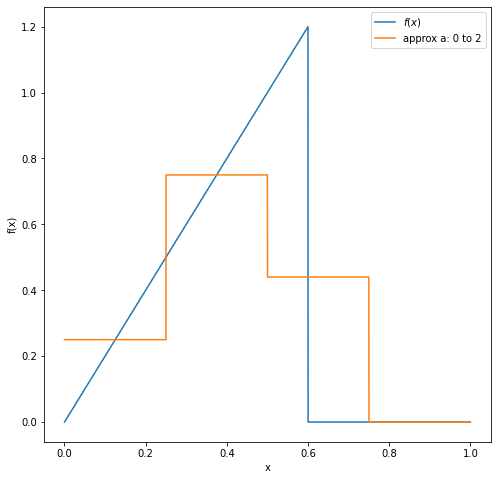

In [16]:
# Calculate and plot the approximate function with a=0,1,2
appro = HaarTransform(3)
ApproPlot(3)

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]



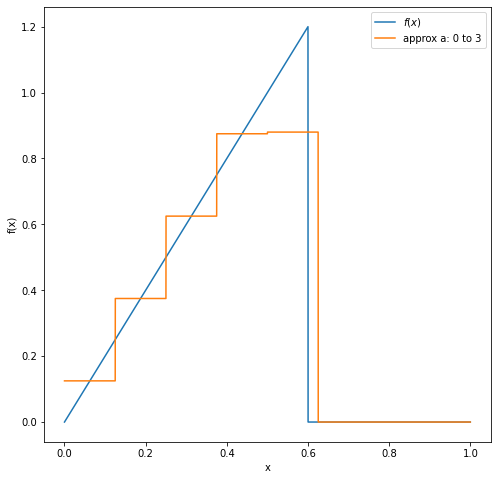

In [17]:
# Calculate and plot the approximate function with a=0,1,2,3
appro = HaarTransform(4)
ApproPlot(4) 

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]

C(4,0)=-0.022097
haar(4,0)=
[2.82842712 2.82842712 2.82842712 ... 0.         0.         0.        ]

C(4,1)=-0.022097
haar(4,1)=
[0. 0. 0. ... 0. 0. 0.]

C(4,2)=-0.022097
haar(4,2)=
[0. 0. 0. ... 0. 0. 0.]

C(4,3)=-0.022097
haar(4,3)=
[0. 0. 0. ... 0. 0. 0.]

C(4,4)=0.064501
haar(4,4)=
[0. 0. 0. ... 0. 0. 0.]

C(4,5)=0.000000
haar(4,5)=
[0. 0. 0. ... 0. 0. 0.]

C(4,6)=0.000000
haar(4,6)=
[0. 0. 0. ... 0. 0. 0.]

C(4,7)=0.000000
haar(4,7)=
[ 0.          0.      

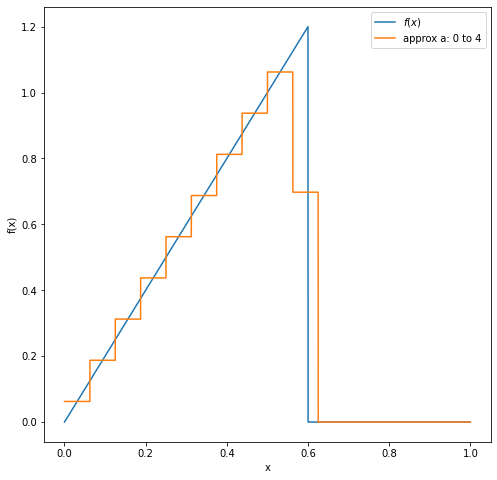

In [18]:
# Calculate and plot the approximate function with a=0,1,2,3,4
basis = 5 # the number of 'a' value would be considered in transformation
appro = HaarTransform(basis)
ApproPlot(basis)

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]

C(4,0)=-0.022097
haar(4,0)=
[2.82842712 2.82842712 2.82842712 ... 0.         0.         0.        ]

C(4,1)=-0.022097
haar(4,1)=
[0. 0. 0. ... 0. 0. 0.]

C(4,2)=-0.022097
haar(4,2)=
[0. 0. 0. ... 0. 0. 0.]

C(4,3)=-0.022097
haar(4,3)=
[0. 0. 0. ... 0. 0. 0.]

C(4,4)=0.064501
haar(4,4)=
[0. 0. 0. ... 0. 0. 0.]

C(4,5)=0.000000
haar(4,5)=
[0. 0. 0. ... 0. 0. 0.]

C(4,6)=0.000000
haar(4,6)=
[0. 0. 0. ... 0. 0. 0.]

C(4,7)=0.000000
haar(4,7)=
[ 0.          0.      

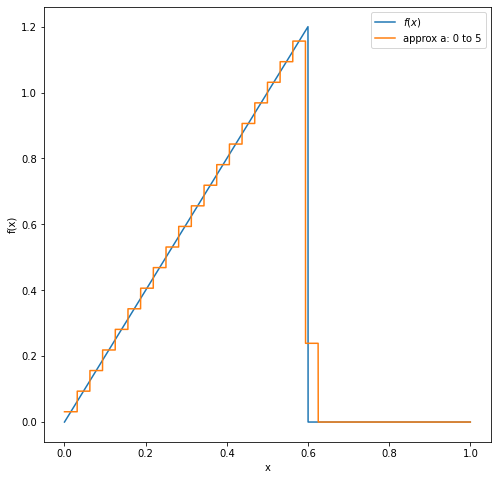

In [19]:
# Calculate and plot the approximate function with a=0,1,2,3,4,5
basis = 6 # the number of 'a' value would be considered in transformation
appro = HaarTransform(basis)
ApproPlot(basis)

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]

C(4,0)=-0.022097
haar(4,0)=
[2.82842712 2.82842712 2.82842712 ... 0.         0.         0.        ]

C(4,1)=-0.022097
haar(4,1)=
[0. 0. 0. ... 0. 0. 0.]

C(4,2)=-0.022097
haar(4,2)=
[0. 0. 0. ... 0. 0. 0.]

C(4,3)=-0.022097
haar(4,3)=
[0. 0. 0. ... 0. 0. 0.]

C(4,4)=0.064501
haar(4,4)=
[0. 0. 0. ... 0. 0. 0.]

C(4,5)=0.000000
haar(4,5)=
[0. 0. 0. ... 0. 0. 0.]

C(4,6)=0.000000
haar(4,6)=
[0. 0. 0. ... 0. 0. 0.]

C(4,7)=0.000000
haar(4,7)=
[ 0.          0.      

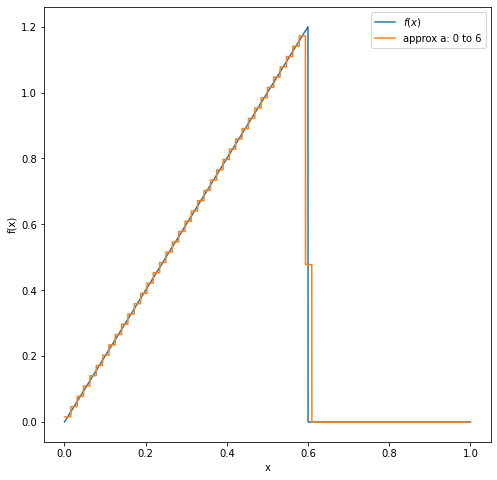

In [20]:
# Calculate and plot the approximate function with a=0,1,2,3,4,5,6
basis = 7 # the number of 'a' value would be considered in transformation
appro = HaarTransform(basis)
ApproPlot(basis)

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]

C(4,0)=-0.022097
haar(4,0)=
[2.82842712 2.82842712 2.82842712 ... 0.         0.         0.        ]

C(4,1)=-0.022097
haar(4,1)=
[0. 0. 0. ... 0. 0. 0.]

C(4,2)=-0.022097
haar(4,2)=
[0. 0. 0. ... 0. 0. 0.]

C(4,3)=-0.022097
haar(4,3)=
[0. 0. 0. ... 0. 0. 0.]

C(4,4)=0.064501
haar(4,4)=
[0. 0. 0. ... 0. 0. 0.]

C(4,5)=0.000000
haar(4,5)=
[0. 0. 0. ... 0. 0. 0.]

C(4,6)=0.000000
haar(4,6)=
[0. 0. 0. ... 0. 0. 0.]

C(4,7)=0.000000
haar(4,7)=
[ 0.          0.      

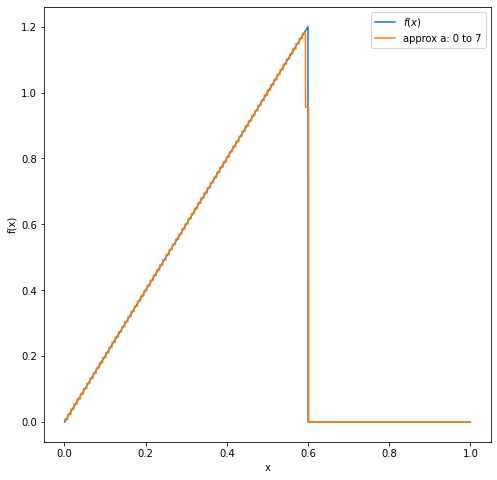

In [21]:
# Calculate and plot the approximate function with a=0,1,2,3,4,5,6,7
basis = 8 # the number of 'a' value would be considered in transformation
appro = HaarTransform(basis)
ApproPlot(basis)

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]

C(4,0)=-0.022097
haar(4,0)=
[2.82842712 2.82842712 2.82842712 ... 0.         0.         0.        ]

C(4,1)=-0.022097
haar(4,1)=
[0. 0. 0. ... 0. 0. 0.]

C(4,2)=-0.022097
haar(4,2)=
[0. 0. 0. ... 0. 0. 0.]

C(4,3)=-0.022097
haar(4,3)=
[0. 0. 0. ... 0. 0. 0.]

C(4,4)=0.064501
haar(4,4)=
[0. 0. 0. ... 0. 0. 0.]

C(4,5)=0.000000
haar(4,5)=
[0. 0. 0. ... 0. 0. 0.]

C(4,6)=0.000000
haar(4,6)=
[0. 0. 0. ... 0. 0. 0.]

C(4,7)=0.000000
haar(4,7)=
[ 0.          0.      

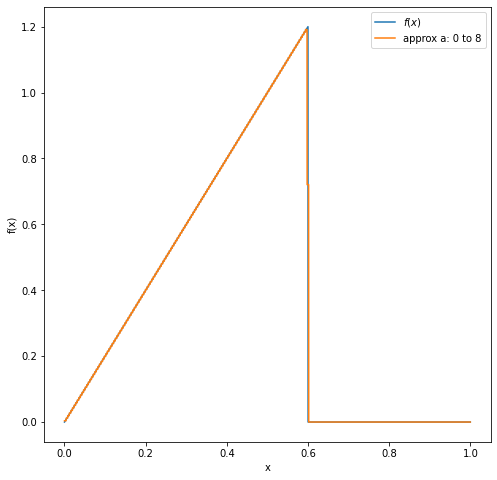

In [22]:
# Calculate and plot the approximate function with a=0,1,2,3,4,5,6,7,8
basis = 9 # the number of 'a' value would be considered in transformation
appro = HaarTransform(basis)
ApproPlot(basis)

C(0,0)= 0.359989
haar(0,0)=
[1. 1. 1. ... 1. 1. 1.]

C(1,0)=0.139980
haar(1,0)=
[ 1.  1.  1. ... -1. -1. -1.]

C(2,0)=-0.176777
haar(2,0)=
[1.41421356 1.41421356 1.41421356 ... 0.         0.         0.        ]

C(2,1)=0.155570
haar(2,1)=
[ 0.          0.          0.         ... -1.41421356 -1.41421356
 -1.41421356]

C(3,0)=-0.062500
haar(3,0)=
[2. 2. 2. ... 0. 0. 0.]

C(3,1)=-0.062500
haar(3,1)=
[0. 0. 0. ... 0. 0. 0.]

C(3,2)=0.220009
haar(3,2)=
[0. 0. 0. ... 0. 0. 0.]

C(3,3)=0.000000
haar(3,3)=
[ 0.  0.  0. ... -2. -2. -2.]

C(4,0)=-0.022097
haar(4,0)=
[2.82842712 2.82842712 2.82842712 ... 0.         0.         0.        ]

C(4,1)=-0.022097
haar(4,1)=
[0. 0. 0. ... 0. 0. 0.]

C(4,2)=-0.022097
haar(4,2)=
[0. 0. 0. ... 0. 0. 0.]

C(4,3)=-0.022097
haar(4,3)=
[0. 0. 0. ... 0. 0. 0.]

C(4,4)=0.064501
haar(4,4)=
[0. 0. 0. ... 0. 0. 0.]

C(4,5)=0.000000
haar(4,5)=
[0. 0. 0. ... 0. 0. 0.]

C(4,6)=0.000000
haar(4,6)=
[0. 0. 0. ... 0. 0. 0.]

C(4,7)=0.000000
haar(4,7)=
[ 0.          0.      

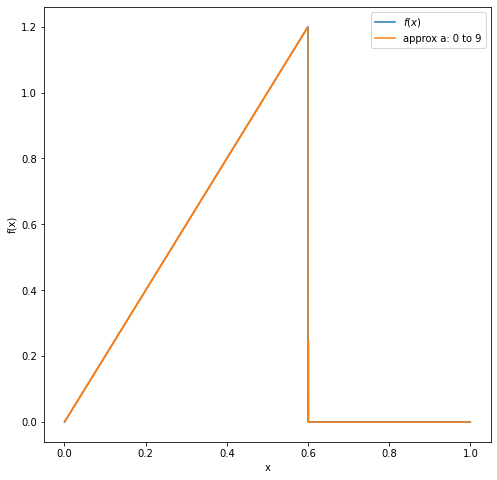

In [23]:
# Calculate and plot the approximate function with a=0,1,2,3,4,5,6,7,8,9
basis = 10 # the number of 'a' value would be considered in transformation
appro = HaarTransform(basis)
ApproPlot(basis)